In [6]:
# parses output of execute.sh and collects execution times

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
result_str = Path('results_server.txt').read_text()
lines = result_str.split('\n')

measures = []

for l in lines:
    if l.startswith('N. workers = '):
        current_n_workers = int(l.split()[3])

    if l.startswith('Exec times for'):
        tokens = l.split()
        alg_name = tokens[3]
        times = [int(t) for t in tokens[5:]]
        data = (current_n_workers, alg_name, np.mean(times), np.std(times))
        measures.append(data)

df = pd.DataFrame(measures, columns = ['NW', 'PROG', 'usecs_mean', 'usecs_std'])
df = df.sort_values('NW')
df

,NW,PROG,usecs_mean,usecs_std
0,1,BFS_par_th,189193.6,658.203798
1,1,BFS_par_th2,171049.6,533.459127
2,1,BFS_par_ff,182671.4,182.417762
3,1,BFS_par_ff2,164322.0,6205.820655
4,1,BFS_seq,57868.4,49.020812
...,...,...,...,...
478,128,BFS_par_ff2,62461.4,1198.415554
475,128,BFS_par_th,31722.4,2593.488816
476,128,BFS_par_th2,79288.4,2758.999500
477,128,BFS_par_ff,84013.4,1423.592863


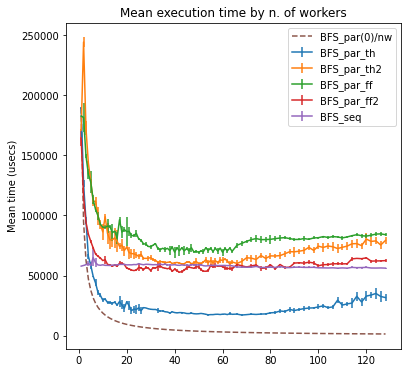

In [8]:

programs = df['PROG'].unique()
n_workers = df['NW'].unique()

fig, ax = plt.subplots(figsize=(6,6))

for prog in programs:
    ax.errorbar(n_workers,
    df[df['PROG'] == prog]['usecs_mean'],
    df[df['PROG'] == prog]['usecs_std'],
    label=prog
    )

# add ideal speed_up
worker_1_time = df[df['PROG'] == 'BFS_par_th']['usecs_mean'][0]

ax.plot(n_workers,
[worker_1_time/nw for nw in n_workers],
label='BFS_par(0)/nw', linestyle='--'
)

ax.legend()
ax.set_ylabel("Mean time (usecs)")
ax.set_title("Mean execution time by n. of workers")
plt.savefig('plots/times.pdf')  

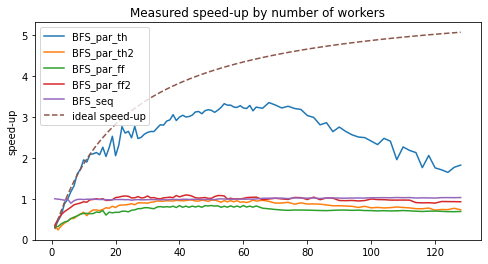

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

seq_times = df[df['PROG'] == 'BFS_seq']['usecs_mean']
seq_time = list(seq_times)[0]

for prog in programs:
    ax.plot(n_workers,
    [seq_time/v for v in df[df['PROG'] == prog]['usecs_mean']],
    label=prog
    )

# add ideal speed_up
worker_1_time = df[df['PROG'] == 'BFS_par_th']['usecs_mean'][0]

ax.plot(n_workers,
[4308/ (16035/nw + 723) for nw in n_workers],
label='ideal speed-up', linestyle='--'
)

ax.legend()
ax.set_ylabel("speed-up")
ax.set_title("Measured speed-up by number of workers")
plt.savefig('plots/speed_ups.pdf')  
